In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib; matplotlib.rcParams['figure.figsize'] = (15,3)

In [2]:
import numpy as np

In [3]:
# Reload all packages - make debugging easier
%load_ext autoreload
%autoreload 2

---

In [4]:
from nnmf_svi_eddie import NNMF

---

In [5]:
import sys 
sys.path.append('..')

from movieLensAnalyzer import MovieLensAnalyzer 
movieLensAnalyzer = MovieLensAnalyzer()
R = movieLensAnalyzer.trainRatingMatrix # take some matrix... just check if it trains and if so how quickly

In [6]:
# 3 hidden layers
model = NNMF(ratings_matrix=R, D=10, Dp=60, nn_hidden_layer_dims=[50, 50, 50], batch_size=200, n_samples=10)

User 0
(100, 10)


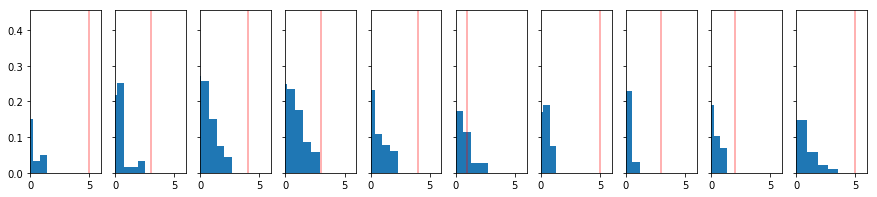

[-2. -1. -1. -0. -1. -1. -1. -2. -1. -1.]
[ 5.  3.  4.  3.  4.  1.  5.  3.  2.  5.]
User 11
(100, 10)


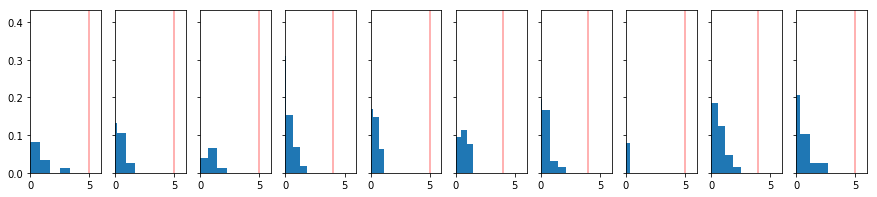

[-2. -2. -2. -1. -1. -1. -1. -3. -1. -1.]
[ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
User 20
(100, 10)


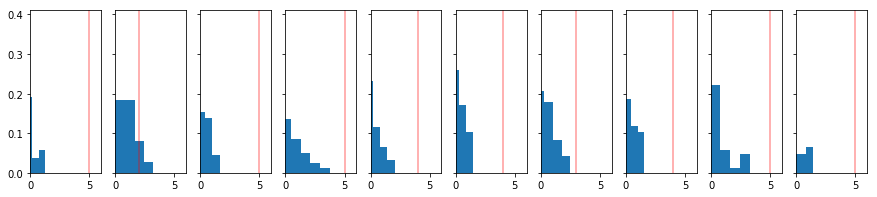

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -2.]
[ 5.  2.  5.  5.  4.  4.  3.  4.  5.  5.]
User 30
(100, 10)


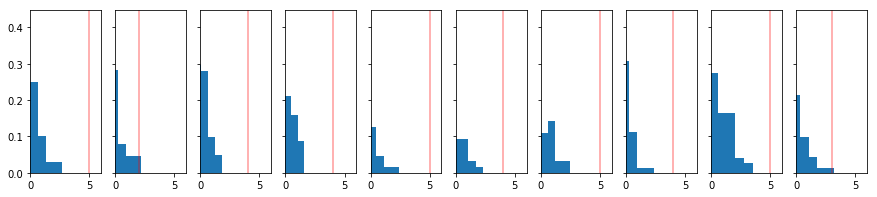

[-1. -1. -1. -1. -2. -1. -1. -1. -0. -1.]
[ 5.  2.  4.  4.  5.  4.  5.  4.  5.  3.]
CPU times: user 12.6 s, sys: 768 ms, total: 13.3 s
Wall time: 9.17 s


[24.262727969559279,
 34.324491411672263,
 15.677110548668548,
 24.881750492661844]

In [7]:
def plot_R(rhats, r=None, title=''):
    print(rhats.shape)
    _, n_items = rhats.shape
    f, axes = plt.subplots(1, n_items, sharex=True, sharey=True)
    i = 0
    for j in range(n_items):
        if r is not None:
            axes[j].axvline(x=r[j], color='r', alpha=0.4)
        axes[j].hist(rhats[:,j], histtype='stepfilled', normed=True)
    plt.xlim([0,6])
    f.suptitle(title)
    plt.show()

def score():
    # For now, just some mse of random users.
    mses = []
    for user_index in [0,11,20,30]:
        print('User', user_index)
        idx = np.where(R[user_index] > 0)
        samples = np.squeeze(model.sample_user_ratings(user_index)[:,idx])
        rhats = np.mean(samples, axis=0)
        r = R[user_index][idx]
        plot_R(samples[:,:10], r[:10])
        print(np.round(rhats[:10]))
        print(r[:10])
        mses.append(np.mean(np.square(rhats - r)))
    return mses

%time score()

In [8]:
mask = R>0

CPU times: user 2min 12s, sys: 15.8 s, total: 2min 28s
Wall time: 48 s
User 0
(100, 10)


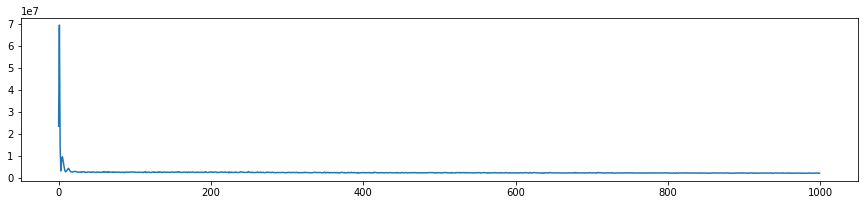

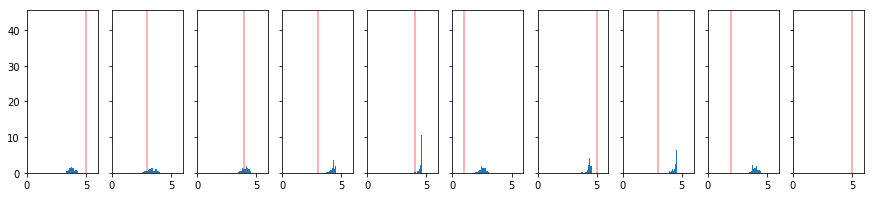

[ 4.  3.  4.  4.  5.  3.  4.  4.  4.  5.]
[ 5.  3.  4.  3.  4.  1.  5.  3.  2.  5.]
User 11
(100, 10)


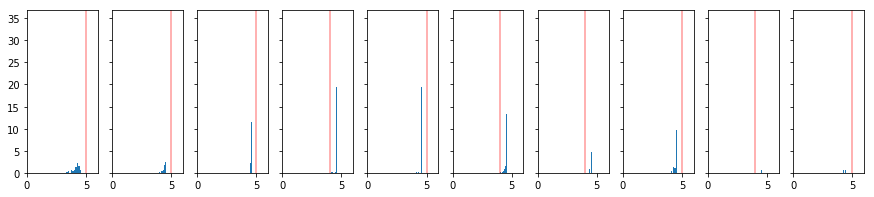

[ 4.  4.  5.  5.  5.  5.  5.  4.  5.  5.]
[ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
User 20
(100, 10)


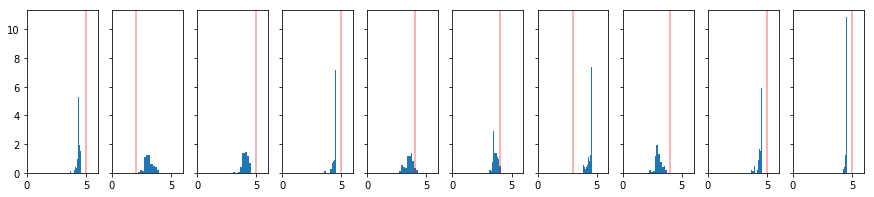

[ 4.  3.  4.  4.  4.  4.  4.  3.  4.  5.]
[ 5.  2.  5.  5.  4.  4.  3.  4.  5.  5.]
User 30
(100, 10)


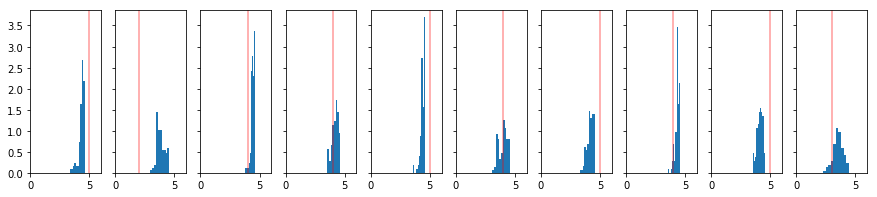

[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
[ 5.  2.  4.  4.  5.  4.  5.  4.  5.  3.]


[0.55811628149846193,
 0.48107087719799491,
 0.61834299248490354,
 0.55720414138627916]

In [9]:
%time losses = model.train(mask=mask, verbose=True)
plt.plot(losses)
score()

In [10]:
#score()